In [1]:
import numpy as np
from qiskit.circuit.library import TwoLocal
from IPython.display import display
import qtpu

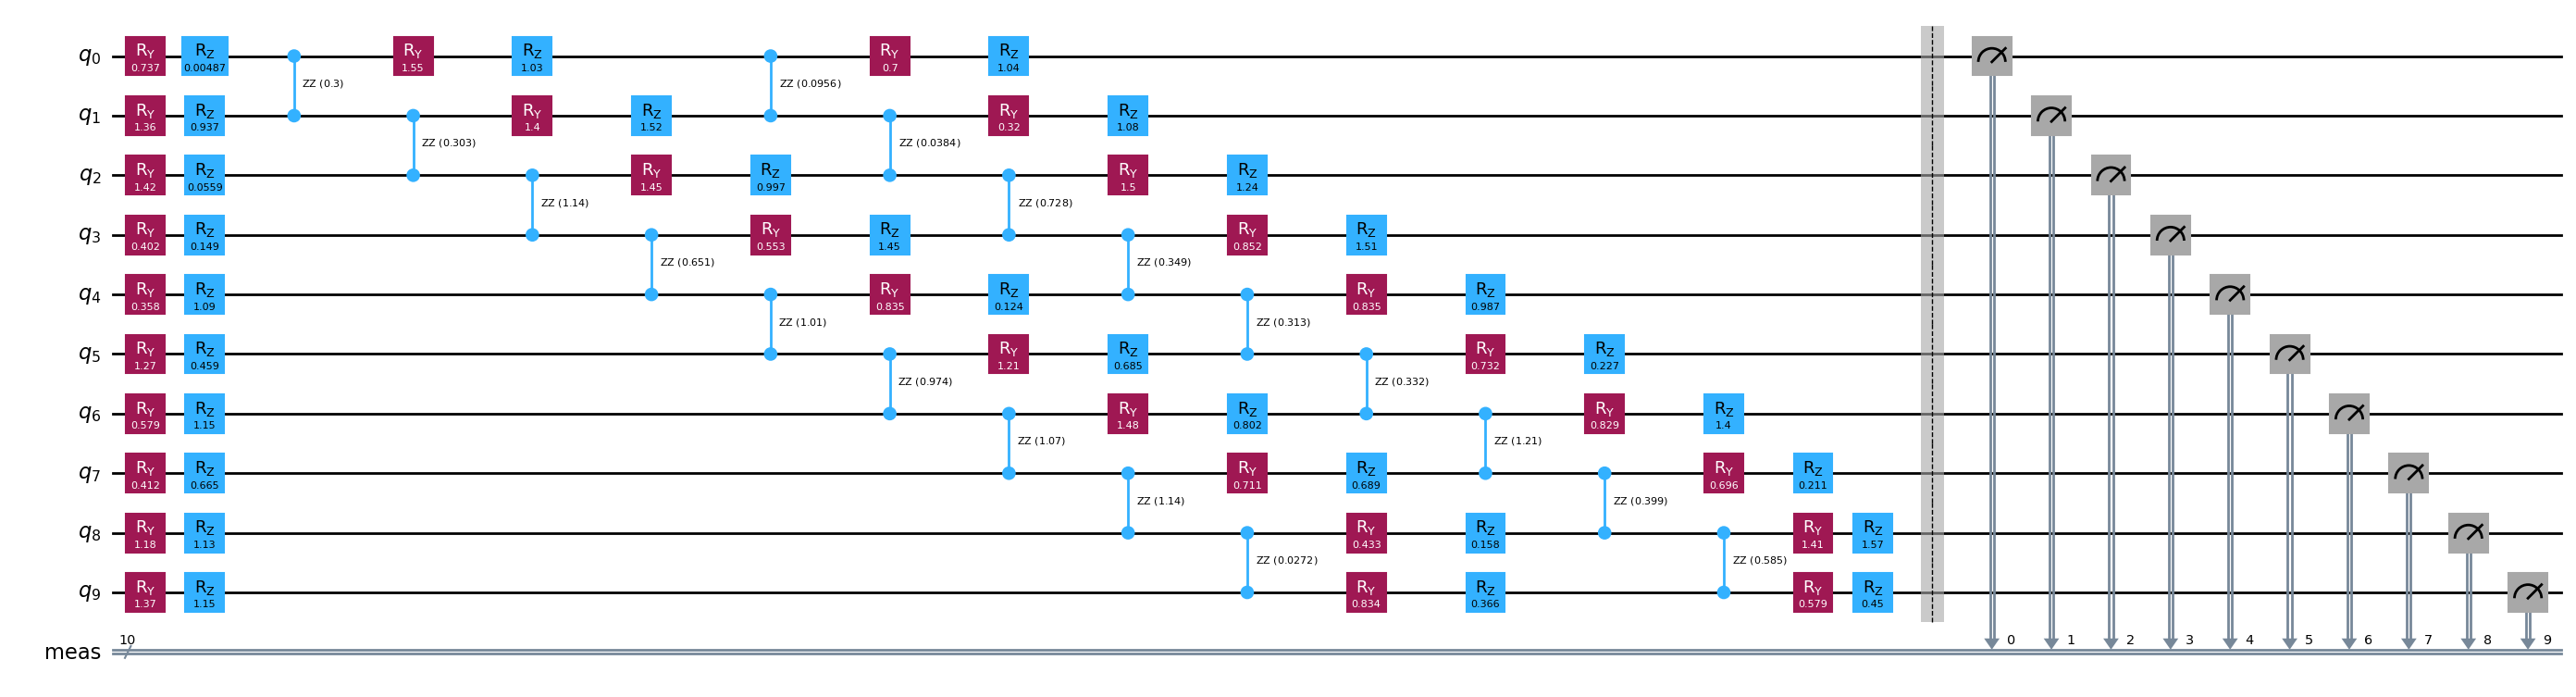

In [2]:
N = 10
circuit = TwoLocal(N, ["ry", "rz"], "rzz", entanglement="linear", reps=2).decompose()
circuit = circuit.assign_parameters(
    {param: np.random.rand() * np.pi / 2 for param in circuit.parameters}
)

circuit.measure_all()

circuit.draw("mpl", fold=-1)

  0%|          | 0/10 [00:00<?, ?it/s]

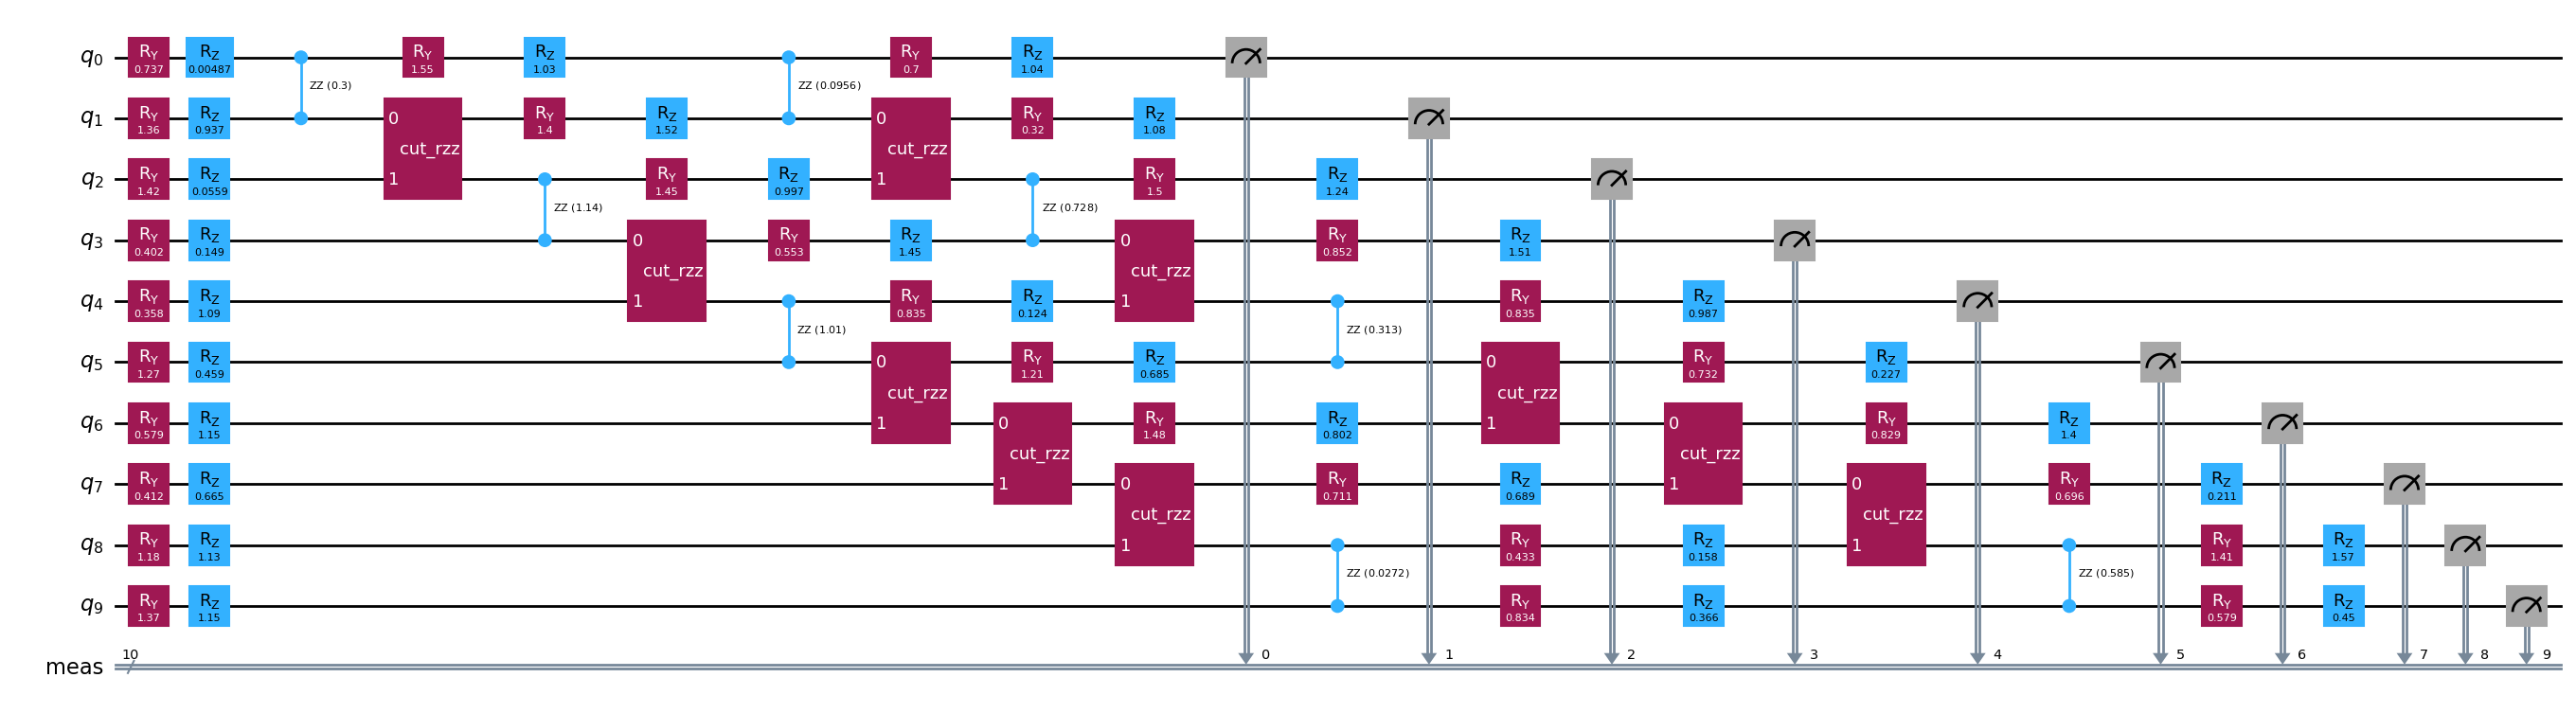

In [3]:
cut_circuit = qtpu.cut(circuit, num_qubits=N//4, show_progress_bar=True, n_trials=10)
cut_circuit.draw("mpl", fold=-1)

Postprocessing Overhead: 5400
Number of circuits: 5256


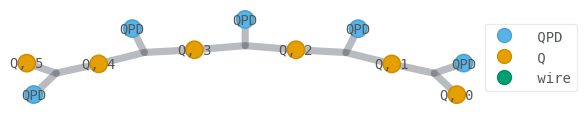

In [5]:
htn = qtpu.circuit_to_hybrid_tn(cut_circuit, num_samples=np.inf)
print(f"Postprocessing Overhead: {htn.contraction_cost()}")
print(f"Number of circuits: {htn.num_circuits()}")
htn.draw()

In [6]:
from qiskit_aer.primitives import EstimatorV2

# get the result <ZZ..Z>
est = EstimatorV2()
res = qtpu.contract(htn, EstimatorV2())
print(f"qTPU result: {res}")

Evaluating 5256 circuits
0.004358769879761772


In [8]:
perf_res = (
    est.run(
        [(circuit.remove_final_measurements(inplace=False), "Z" * circuit.num_qubits)]
    )
    .result()[0]
    .data.evs
)
print(f"Qiskit result: {perf_res}")
print(f"Error: {abs(res - perf_res)}")

0.00435876987976172
Error: 5.204170427930421e-17
